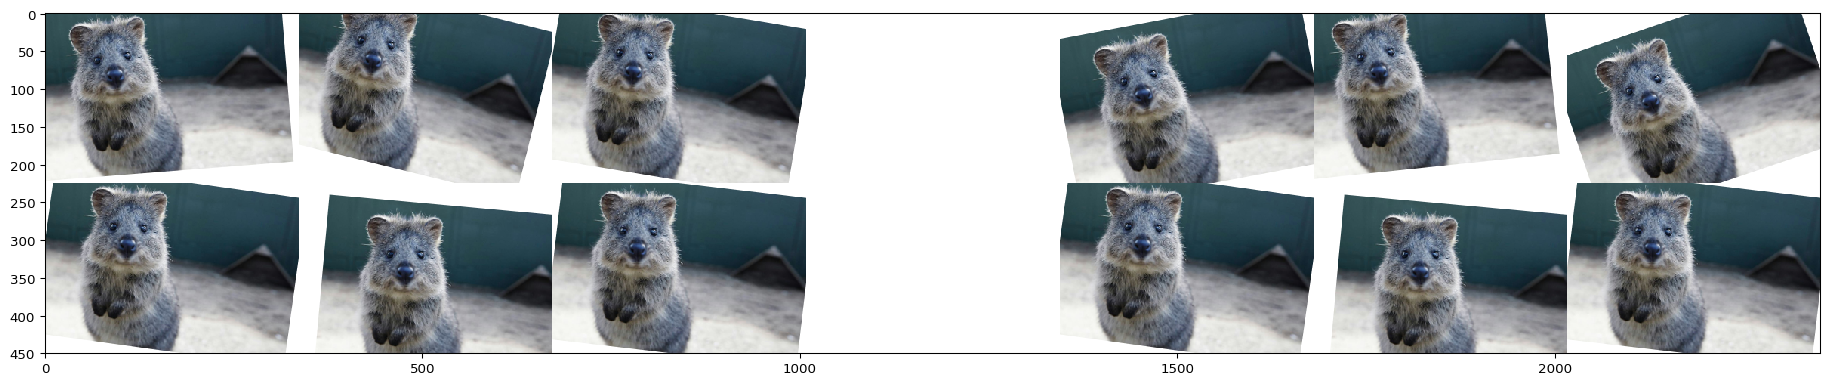

In [20]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
%matplotlib inline
ia.seed(2)

aug = iaa.Affine(translate_px=(-30, 30), rotate=(-20, 20), cval=255)
image = ia.quokka(size=0.35)
batches = [[image] * 3, [image] * 3]  # two batches of each three images

# augment in stochastic mode
images_stochastic = [aug.augment_images(batch) for batch in batches]

# augment in deterministic mode
aug_det = aug.to_deterministic()
images_deterministic = [aug_det.augment_images(batch) for batch in batches]

# visualize
whitespace = np.full(image.shape, 255, dtype=np.uint8)
ia.imshow(
    ia.draw_grid(
        images_stochastic[0] + [whitespace] + images_stochastic[1] +  # first row
        images_deterministic[0] + [whitespace] + images_deterministic[1],  # second row
        rows=2,
        cols=2*3
    )
)

# 显示keypoint 到image上

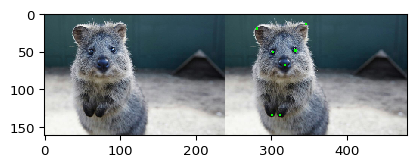

In [31]:
image = ia.quokka(size=0.25)
keypoints = ia.quokka_keypoints(size=0.25)

ia.imshow(
    np.hstack([
        image,
        keypoints.draw_on_image(image)
    ])
)

# 

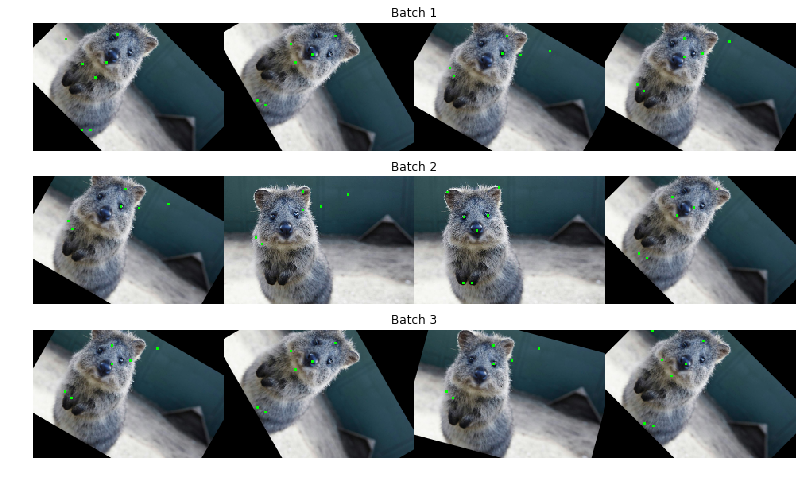

In [37]:
BATCH_SIZE = 4
images_batch = [image] * BATCH_SIZE
keypoints_batch = [keypoints] * BATCH_SIZE


aug = iaa.Affine(rotate=[0, 15, 30, 45, 60])

# stochastic mode
images_aug1 = aug.augment_images(images_batch)
images_aug2 = aug.augment_images(images_batch)
images_aug3 = aug.augment_images(images_batch)
keypoints_aug1 = aug.augment_keypoints(keypoints_batch)
keypoints_aug2 = aug.augment_keypoints(keypoints_batch)
keypoints_aug3 = aug.augment_keypoints(keypoints_batch)

import matplotlib.pyplot as plt

# draw keypoints on images and convert the results to a single image
def draw_and_merge(ims, kps):
    return np.hstack([kp_i.draw_on_image(im_i) for im_i, kp_i in zip(ims, kps)])

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
axes[0].imshow(draw_and_merge(images_aug1, keypoints_aug1))
axes[1].imshow(draw_and_merge(images_aug2, keypoints_aug2))
axes[2].imshow(draw_and_merge(images_aug3, keypoints_aug3))
for i in range(3):
    axes[i].set_title("Batch %d" % (i+1,))
    axes[i].axis("off")

# keypoint 
- aug.to_deterministic

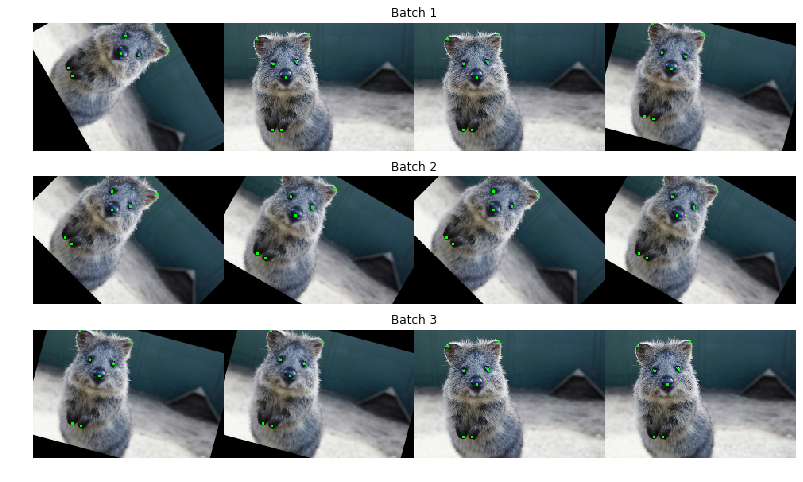

In [42]:
aug_det = aug.to_deterministic()  # <- this changed

images_aug1 = aug_det.augment_images(images_batch)
images_aug2 = aug_det.augment_images(images_batch)
images_aug3 = aug_det.augment_images(images_batch)
keypoints_aug1 = aug_det.augment_keypoints(keypoints_batch)
keypoints_aug2 = aug_det.augment_keypoints(keypoints_batch)
keypoints_aug3 = aug_det.augment_keypoints(keypoints_batch)

# draw keypoints on images and convert the results to a single image
def draw_and_merge(ims, kps):
    return np.hstack([kp_i.draw_on_image(im_i) for im_i, kp_i in zip(ims, kps)])

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
axes[0].imshow(draw_and_merge(images_aug1, keypoints_aug1))
axes[1].imshow(draw_and_merge(images_aug2, keypoints_aug2))
axes[2].imshow(draw_and_merge(images_aug3, keypoints_aug3))
for i in range(3):
    axes[i].set_title("Batch %d" % (i+1,))
    axes[i].axis("off")

# 推荐用法

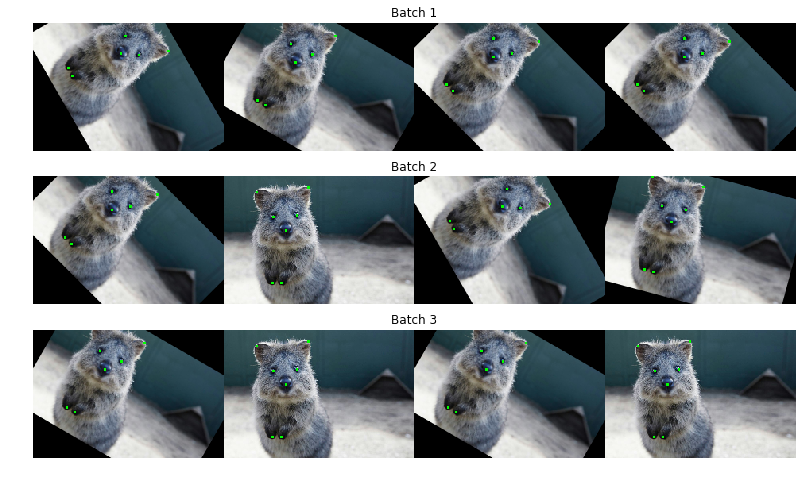

In [52]:
aug_det        = aug.to_deterministic()
images_aug1    = aug_det.augment_images(images_batch)
keypoints_aug1 = aug_det.augment_keypoints(keypoints_batch)

aug_det        = aug.to_deterministic()
images_aug2    = aug_det.augment_images(images_batch)
keypoints_aug2 = aug_det.augment_keypoints(keypoints_batch)

aug_det        = aug.to_deterministic()
images_aug3    = aug_det.augment_images(images_batch)
keypoints_aug3 = aug_det.augment_keypoints(keypoints_batch)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
axes[0].imshow(draw_and_merge(images_aug1, keypoints_aug1))
axes[1].imshow(draw_and_merge(images_aug2, keypoints_aug2))
axes[2].imshow(draw_and_merge(images_aug3, keypoints_aug3))
for i in range(3):
    axes[i].set_title("Batch %d" % (i+1,))
    axes[i].axis("off")